<a href="https://colab.research.google.com/github/Churabros/phase_4/blob/main/Phase_4_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Summary
# Business understaning
# Data Understanding
# Data Exploration
# Data Preprocesing
# EDA
# Modeling
# Evaluation
# conclusion
# Reccomendation

### Data Exploration and Preprocessing

In [ ]:
import pandas as pd

In [ ]:
# df = pd.read_csv('/content/tweet_product_company.csv', encoding='latin-1') # Try 'latin-1' encoding

In [ ]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin-1')

In [ ]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
# renaming the columns for easier workflow
df.rename(columns={'tweet_text': 'tweet', 'emotion_in_tweet_is_directed_at': 'product', 'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment', }, inplace=True)
df.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [ ]:
# removing the row from sentiment column where a tweet is missing
df = df.dropna(subset=['tweet'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [ ]:
df['product'].isna().sum()

5801

In [ ]:
# # First replace NaN values with empty strings
# df['tweet_text'].fillna('', inplace=True)

# # Now check for whitespace-only strings
# df[df['tweet_text'].str.isspace()].shape[0]

In [ ]:
df['product'].fillna('Missing', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    9092 non-null   object
 2   sentiment  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
No emotion toward brand or product,5388
Positive emotion,2978
Negative emotion,570
I can't tell,156


In [ ]:
# renaming sentiment labels
df['sentiment'] = df['sentiment'].replace({'No emotion toward brand or product': 'neutral',
                                           'Positive emotion': 'positive',
                                           'Negative emotion': 'negative',
                                           'I can\'t tell': 'can\'t tell'})

df['sentiment'].value_counts()

,count
sentiment,
neutral,5388
positive,2978
negative,570
can't tell,156


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    # checking if text is a string before applying regex
    if isinstance(text, str):
        # removing mentions (@username)
        text = re.sub(r'@\w+', '', text)

        # removing URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)

        # removing hashtags
        text = re.sub(r'#\w+', '', text)

        # removing extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()

        # removing emojis
        text = re.sub(r'[^\x00-\x7F]+', '', text)

        # removing special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # removing punctuation
        text = re.sub(r'[^\w\s]', '', text)

        # converting to lowercase
        text = text.lower()
    return text

# applying cleaning to the dataset
df['cleaned_text'] = df['tweet'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet         9092 non-null   object
 1   product       9092 non-null   object
 2   sentiment     9092 non-null   object
 3   cleaned_text  9092 non-null   object
dtypes: object(4)
memory usage: 355.2+ KB


In [ ]:
df.head()

,tweet,product,sentiment,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,i have a g iphone after hrs tweeting at it ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,know about awesome ipadiphone app that youll ...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,can not wait for also they should sale them d...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,great stuff on fri marissa mayer google tim o...


In [ ]:
# initializing stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

# function to do tokenization, stopword removal, and lemmatization
def process_text(text):
    if isinstance(text, str):
        # tokenizing the text
        tokens = word_tokenize(text)

        # removing stopwords
        filtered_tokens = []
        for token in tokens:
          if token not in stop_words:
            filtered_tokens.append(token)

        # lemmatization
        lem_tokens = []
        for token in filtered_tokens:
          lem_tokens.append(lem.lemmatize(token))

        # joining tokens back to a single string
        return ' '.join(lem_tokens)
    return text

# applying the function to the cleaned text
df['processed_text'] = df['cleaned_text'].apply(process_text)

In [ ]:
df.head()

,tweet,product,sentiment,cleaned_text,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,i have a g iphone after hrs tweeting at it ...,g iphone hr tweeting dead need upgrade plugin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,know about awesome ipadiphone app that youll ...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,can not wait for also they should sale them d...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,i hope this years festival isnt as crashy as t...,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,great stuff on fri marissa mayer google tim o...,great stuff fri marissa mayer google tim oreil...


In [ ]:
# from nltk.tokenize import word_tokenize
# import nltk
# nltk.download('punkt')  # Download tokenizer

# # Function to tokenize text
# def tokenize_text(text):
#     return word_tokenize(text)

# # Apply tokenization
# df['tokenized_text'] = df['cleaned_text'].apply(tokenize_text)

In [ ]:
# df.head()

### EDA

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

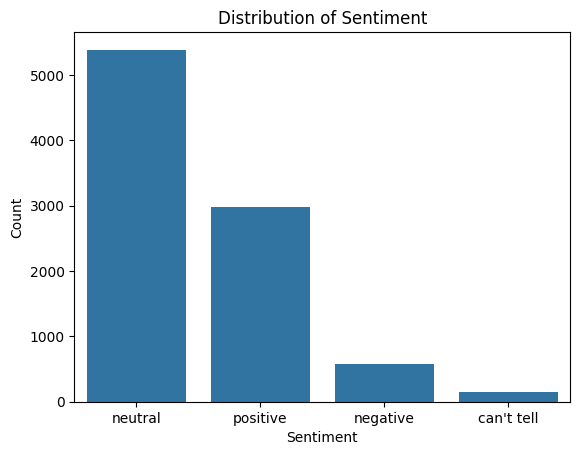

In [ ]:
# visualizing the count of sentiments.
sentiment_counts = df['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

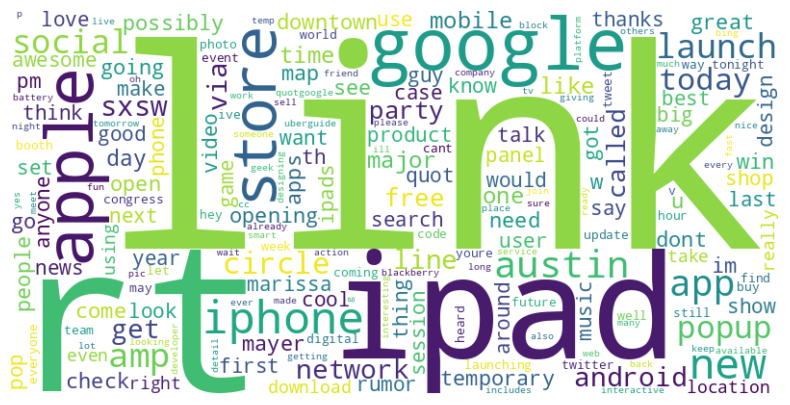

In [ ]:
# a word cloud to visualize commonly used words.

from wordcloud import WordCloud
from collections import Counter

# combining all processed text into a single string
all_processed_text = ' '.join(df['processed_text'])

# counting word frequencies
word_freq = Counter(all_processed_text.split())

# creating the word cloud from frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# plotting
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

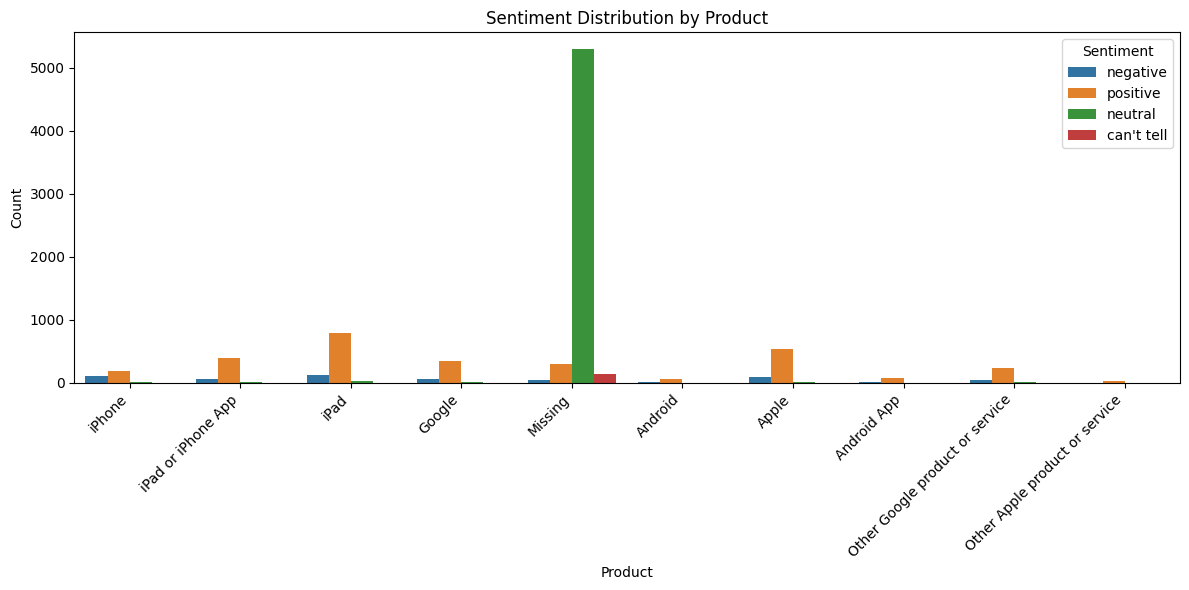

In [ ]:
# visualizing how sentiments are distributed across different products.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='product', hue='sentiment')
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

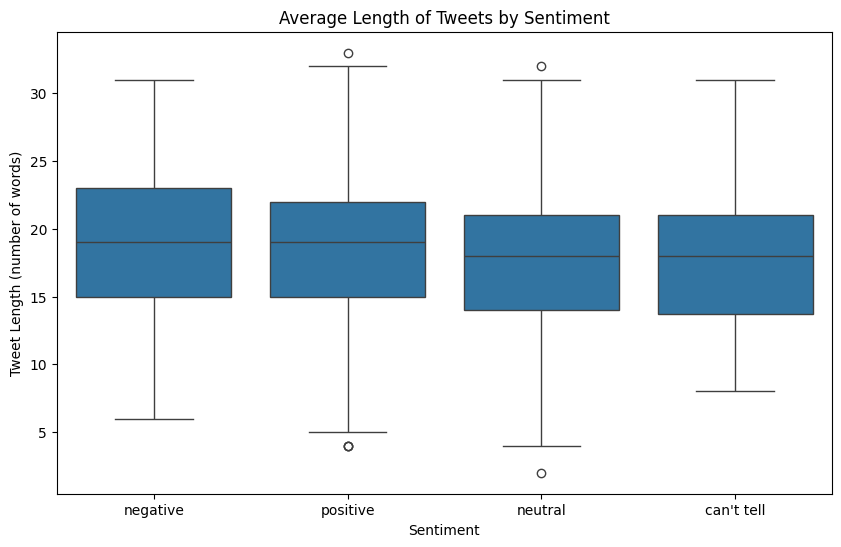

In [ ]:
# calculating the length of each tweet and visualizing the average length by sentiment.
df['tweet_length'] = df['tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='tweet_length', data=df)
plt.title('Average Length of Tweets by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (number of words)')
plt.show()

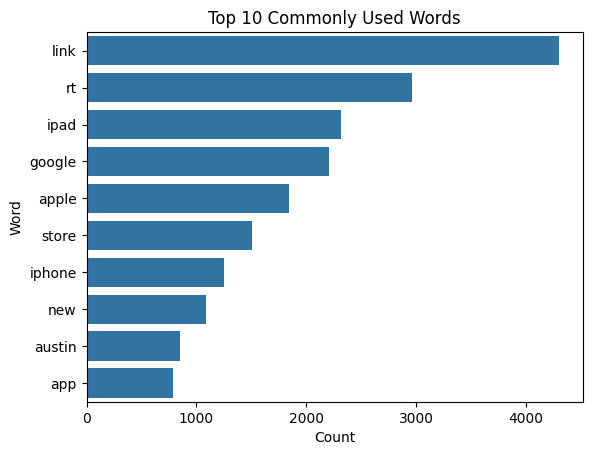

In [ ]:
# visualizing the most common tokens
from collections import Counter

all_words = ' '.join(df['processed_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)  # top 10 most common words
# common_words

# creating a DataFrame for better visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
sns.barplot(x='Count', y='Word', data=common_words_df)
plt.title('Top 10 Commonly Used Words')
plt.show()